![Banner challenge](https://raw.githubusercontent.com/EuniceGarcia503/Challenge3_TelecomX_LATAM_parte_II/refs/heads/main/Imagenes_TelecomX_Parte2/Banner%20de%20Challenge%20parte%202.png)

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

El análisis de evasión de clientes (también conocido como "churn analysis") es un problema clásico de clasificación en el campo del aprendizaje automático. El objetivo es construir un modelo que pueda predecir qué clientes tienen más probabilidades de cancelar sus servicios en un futuro cercano.

En esencia, estás buscando crear un modelo que aprenda a identificar patrones y características en los datos de los clientes que se correlacionan con la probabilidad de abandono. Estos patrones pueden incluir información demográfica, historial de uso del servicio, interacciones con el servicio al cliente, entre otros.

Para lograr esto, deberás seguir un proceso que incluye:

* Recopilación y preparación de datos: Obtener los datos relevantes de los clientes y limpiarlos para eliminar errores o inconsistencias.

* Ingeniería de características: Crear nuevas características a partir de los datos existentes que puedan ser útiles para el modelo.

* Selección de modelo: Elegir un algoritmo de clasificación adecuado para el problema, como regresión logística, árboles de decisión, bosques aleatorios o máquinas de vectores de soporte.

* Entrenamiento del modelo: Utilizar los datos preparados para entrenar el modelo y ajustar sus parámetros.

* Evaluación del modelo: Medir el rendimiento del modelo utilizando métricas como precisión, exhaustividad, F1-score y AUC-ROC.

* Implementación del modelo: Integrar el modelo en un sistema que pueda predecir la probabilidad de abandono de los clientes en tiempo real.

El proceso de preparación de datos y selección de modelos debe seguir este flujo:

Conocer tus datos:
--

* Tipo de variables: Identificar si son categóricas (nominales, ordinales, binarias) o numéricas (discretas, continuas).
* Distribución: Analizar cómo se distribuyen los valores de cada variable (histogramas, boxplots, etc.).
Valores faltantes: Identificar si hay valores faltantes y cómo manejarlos.
* Valores atípicos: Detectar valores atípicos que puedan afectar el rendimiento del modelo.
* Relaciones: Explorar las relaciones entre las variables (correlaciones, gráficos de dispersión, etc.).

Tratamiento de datos:
--
* En función de los datos: Aplicar las técnicas de preprocesamiento adecuadas para cada tipo de variable y para abordar los problemas identificados en el paso anterior (escalado, transformación, codificación, imputación de valores faltantes, etc.).

* En función de los modelos: Considerar los requisitos y supuestos de los modelos que planeas utilizar. Algunos modelos son más sensibles a la escala de las variables, a la presencia de valores atípicos o a la multicolinealidad.

Selección de modelos:
--
* En función del problema: Elegir modelos que sean adecuados para el tipo de problema que estás resolviendo (clasificación, regresión, clustering, etc.).

* En función de los datos: Considerar las características de tus datos al elegir un modelo. Algunos modelos funcionan mejor con datos lineales, mientras que otros son más adecuados para datos no lineales.

* En función de los objetivos: Tener en cuenta tus objetivos al elegir un modelo. ¿Quieres maximizar la precisión? ¿Quieres obtener un modelo interpretable? ¿Quieres un modelo que sea robusto a valores atípicos?
En resumen, el proceso de preparación de datos y selección de modelos es iterativo y depende de tus datos, tus modelos y tus objetivos. ¡No hay una receta única!

#⚪ **Importar de datos.**

In [162]:
import pandas as pd
import requests
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
#Importando Json

url1 = "https://raw.githubusercontent.com/EuniceGarcia503/Challenge3_TelecomX_LATAM_parte_II/refs/heads/main/TelecomX_Data%20(1).json"
response = requests.get(url1)
data = response.json()
dfjson = pd.DataFrame(data)
dfjson.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [164]:
dfjson_normalizado = json_normalize(data)
dfjson_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [165]:
#Importar en formato CSV
dfjson_normalizado.to_csv('TelecomX_Data.csv', index=False)

#🛠️**Preparación de los datos.**

---

![Banner preparación datos](https://raw.githubusercontent.com/EuniceGarcia503/Challenge3_TelecomX_LATAM_parte_II/refs/heads/main/Imagenes_TelecomX_Parte2/Banner_%20Secci%C3%B3n_%20preparaci%C3%B3n.png)

---

##🔵 **Extracción del Archivo Tratado.**

In [166]:
url2 = "https://raw.githubusercontent.com/EuniceGarcia503/Challenge2_TelecomX_LATAM/refs/heads/main/TelecomX_Data.csv"
df = pd.read_csv(url2)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [167]:
#Convertir columna account.Charges.Total en tipo float64.
df['account.Charges.Total'] = df['account.Charges.Total'].str.replace(',', '.',regex=True)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [168]:
#Agregar columna de Cargo_Diario.
#Creo columna Cuentas_diarias.
df['Cuentas_diarias'] = df['account.Charges.Monthly']/30

---

##🔵**Verificación de Proporción del Churn.**


Cuadro de frecuencia absoluta y relativa de 'Cancelación'.


,Frecuencia,Proporción (%)
Churn,,
No,5174,73.46
Yes,1869,26.54


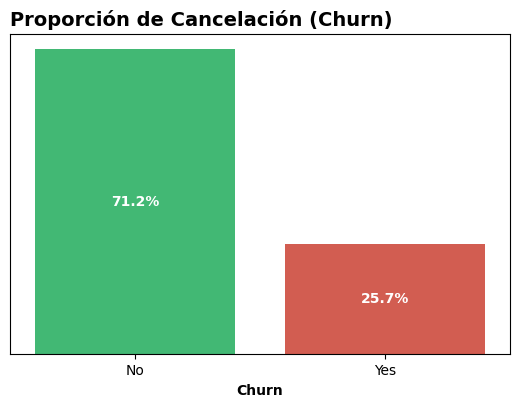

In [169]:
#Código para verificar proporción de cancelación.
churn_frecuencia = df['Churn'].value_counts()
churn_proporcion = df['Churn'].value_counts(normalize=True)*100

#Tabla combinada.
df_churn = pd.DataFrame(
    {'Frecuencia': churn_frecuencia, 'Proporción (%)': churn_proporcion.round(2)}
)

print(f"Cuadro de frecuencia absoluta y relativa de 'Cancelación'.")
display(df_churn)
print(f"\n")

#Gráfico de barras.
colores = ['#2ecc71', '#e74c3c']

fig, ax = plt.subplots(figsize=(5, 4))

sns.countplot(x='Churn', hue='Churn', data=df, palette=colores, legend=False, ax=ax)

# Título y etiquetas
ax.set_title('Proporción de Cancelación (Churn)', fontsize=14, loc='left', fontweight='bold')
ax.set_xlabel('Churn', fontweight='bold')
ax.set_ylabel('')  # sin título en eje Y

# Quitar ticks del eje Y
ax.set_yticks([])

# Mostrar porcentajes dentro de las barras
total = len(df)
for p in ax.patches:
    height = p.get_height()
    porcentaje = f'{100 * height / total:.1f}%'
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        porcentaje,
        ha='center', va='center', color='white', fontweight='bold'
    )

# Dejar margen inferior y recortar el resto
plt.subplots_adjust(top=1, bottom=0.2, left=0, right=1)

plt.show()
print()


---

##🔵**Tratando Valores Nulos.**

In [170]:
#Eliminamos los datos nulos en la variable dependiente.
df = df.dropna(subset=['Churn'])

In [171]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


>**Nota:**
Eliminamos datos nulos en la columna de `Charges.Totales` dado que 11 elementos no son representativos y consideramos que su incidencia es mínima.

In [172]:
#Código para borrar datos nulos.
df = df.dropna(subset=['account.Charges.Total'])

In [173]:
#Verificamos datos nulos en df.
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [174]:
#Verificación del los metadatos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

---

##🔵**Eliminación de Columnas Irrelevantes.**

>📌 **Nota:**  
>  "📑 Tomamos como referencia los resultados del análisis de correlación de variables ya antes realizado donde la variable `Cuentas_diarias` es igual a cargo_mensual / 30, no aporta información adicional al modelo. "

In [175]:
#Código para borrar columna customerID Cuentas_diarias.
df = df.drop(columns=['customerID'])

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   object 
 1   customer.gender            7032 non-null   object 
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   object 
 4   customer.Dependents        7032 non-null   object 
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   object 
 7   phone.MultipleLines        7032 non-null   object 
 8   internet.InternetService   7032 non-null   object 
 9   internet.OnlineSecurity    7032 non-null   object 
 10  internet.OnlineBackup      7032 non-null   object 
 11  internet.DeviceProtection  7032 non-null   object 
 12  internet.TechSupport       7032 non-null   object 
 13  internet.StreamingTV       7032 non-null   object 
 1

---

**Eliminando datos redundantes.**

In [177]:
#Para eliminar redundancia en los datos.
df_clean = df.copy()

In [178]:
df_clean.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_diarias'],
      dtype='object')

In [179]:
col_agrupar = ['internet.OnlineSecurity', 'internet.OnlineBackup',
               'internet.DeviceProtection', 'internet.TechSupport',
               'internet.StreamingTV', 'internet.StreamingMovies']

for col in col_agrupar:
    df_clean[col] = df_clean[col].replace({'No internet service': 'No'})

In [180]:
col_categoricas = ['Churn', 'customer.gender',
                   'customer.Partner', 'customer.Dependents',
                   'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
                   'internet.OnlineSecurity', 'internet.OnlineBackup',
                   'internet.DeviceProtection', 'internet.TechSupport',
                   'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
                    'account.PaperlessBilling', 'account.PaymentMethod']

In [181]:
##Prueba si cargo_total es ≈ antigüedad × cargo_mensual (posible eliminar en modelos lineales)
prueba_variable_ctotal = pd.DataFrame(df_clean[['customer.tenure','account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_diarias']]).copy()
prueba_variable_ctotal['prueba'] = (prueba_variable_ctotal['customer.tenure'] * prueba_variable_ctotal['account.Charges.Monthly']).round(2)

In [182]:
prueba_variable_ctotal['prueba'].describe()

,prueba
count,7032.000000
mean,2283.147248
std,2264.703327
min,18.800000
25%,397.800000
50%,1394.575000
75%,3791.250000
max,8550.000000


>📌 **Nota:**  
>  "📑 Comparo con datos EDA.

Comparación cargo_total vs. prueba (tenure × cargo_mensual)
Medias y medianas casi iguales.

* `cargo_total` media = 2279.7

* `prueba` media = 2283.1
  👉 Prácticamente idénticas.

* `cargo_total` mediana = 1394.55

* `prueba` mediana = 1394.57
👉 Son iguales al centésimo.

* **Desviaciones estándar y rangos muy similares.**

* `cargo_total` std = 2266.79

* `prueba` std = 2264.70
👉 Diferencia mínima.

* **Máximos y cuartiles son casi idénticos (ej: Q1 ≈ 398 vs 397.8).**
  Pequeñas diferencias.
  
  En cargo_total aparecen valores como 0 (probablemente clientes sin facturación inicial, descuentos o redondeos).

  En prueba el cálculo no llega exactamente a esos casos especiales (por eso el mínimo es 18.8 en lugar de 0).
  👉 Esto confirma que cargo_total incluye ajustes reales del negocio (cargos, descuentos, periodos de gracia), no solo la multiplicación matemática.

✅ **Conclusión práctica.**

* `cargo_total` ≈ `antigüedad` × `cargo_mensual` en casi todos los clientes.

  Las diferencias pequeñas provienen de reglas de negocio (descuentos, cargos iniciales, promociones).

  **Implicación para el modelado:**

  * En modelos lineales (ej. regresión logística) → conviene eliminar cargo_total para evitar colinealidad con antigüedad y cargo_mensual.

  * En árboles de decisión → puede quedarse, pero no aporta información nueva, solo reparte importancia entre variables.

---

✅ **Conclusión práctica.**

Mantener `account.Charges.Monthly` y `Cuentas_diarias` es también redundante.
Pero la ventaja de mantener `Cuentas_diarias` es que nos quedaríamos con una variable económica normalizada.
De manera que nos quedaríamos con una variable temporal `customer.tenure` y la variable económica normalizada para recalcular las columnas borradas y ganar interpretabilidad si se requiere para otro modelo explicativo y no predictivo.

---

##🔵 **Encoding.**

In [183]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   object 
 1   customer.gender            7032 non-null   object 
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   object 
 4   customer.Dependents        7032 non-null   object 
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   object 
 7   phone.MultipleLines        7032 non-null   object 
 8   internet.InternetService   7032 non-null   object 
 9   internet.OnlineSecurity    7032 non-null   object 
 10  internet.OnlineBackup      7032 non-null   object 
 11  internet.DeviceProtection  7032 non-null   object 
 12  internet.TechSupport       7032 non-null   object 
 13  internet.StreamingTV       7032 non-null   object 
 1

⚪ **Get_dummies para análisis preliminar del nuevo dataset.**

In [184]:
df_encoding_dummies = pd.get_dummies(df_clean, columns=col_categoricas, drop_first=True)
df_encoding_dummies.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.186667,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [185]:
df_encoding_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7032 non-null   int64  
 1   customer.tenure                                7032 non-null   int64  
 2   account.Charges.Monthly                        7032 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   Cuentas_diarias                                7032 non-null   float64
 5   Churn_Yes                                      7032 non-null   bool   
 6   customer.gender_Male                           7032 non-null   bool   
 7   customer.Partner_Yes                           7032 non-null   bool   
 8   customer.Dependents_Yes                        7032 non-null   bool   
 9   phone.PhoneService_Yes                         7032 non-n

⚪ **Convertir variables binarias de texto en numéricas.**

In [186]:
##Copiar df.
df_clean_copy = df_clean.copy()

In [187]:
#Agrupar
col_agrupar_2 = ['phone.MultipleLines']

for col in col_agrupar_2:
    df_clean_copy[col] = df_clean[col].replace({'No phone service':'No'})

In [188]:
df_clean.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_diarias'],
      dtype='object')

In [189]:
#Cambio a binaria el churn.
df_clean_copy['Churn'] = df_clean_copy['Churn'].map({'Yes': 1, 'No': 0})

In [190]:
#Cambio a numéricas las categóricas binarias.
categoricas_bin = ['customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.OnlineSecurity',
            'internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies',
            'account.PaperlessBilling']

In [191]:
# Diccionario de mapeo genérico
map_bin = {'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1}

# Aplicar mapeo a todas las columnas binarias de texto
df_clean_copy[categoricas_bin] = df_clean_copy[categoricas_bin].apply(lambda col: col.map(map_bin))

# Verificar si hay valores NaN que no se mapearon
print(df_clean_copy[categoricas_bin].isna().sum())


customer.gender              0
customer.Partner             0
customer.Dependents          0
phone.PhoneService           0
phone.MultipleLines          0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.PaperlessBilling     0
dtype: int64


⚪ **Separamos feature y target.**

In [192]:
X = df_clean_copy.drop(columns=['Churn'])
y = df_clean_copy['Churn']

⚪ **Separación en grupos de entrenamiento y prueba.**

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

⚪ **OneHotEncoder para análisis usar en modelo de clasificación.**

In [195]:
#Importando bibliotecas.
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [196]:
df_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer.gender            7032 non-null   int64  
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   int64  
 4   customer.Dependents        7032 non-null   int64  
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   int64  
 7   phone.MultipleLines        7032 non-null   int64  
 8   internet.InternetService   7032 non-null   object 
 9   internet.OnlineSecurity    7032 non-null   int64  
 10  internet.OnlineBackup      7032 non-null   int64  
 11  internet.DeviceProtection  7032 non-null   int64  
 12  internet.TechSupport       7032 non-null   int64  
 13  internet.StreamingTV       7032 non-null   int64  
 1

In [197]:
#Variables binarias y numéricas.
categoricas = ['internet.InternetService','account.Contract','account.PaymentMethod']

numericas = ['customer.SeniorCitizen','customer.tenure','account.Charges.Monthly','account.Charges.Total','Cuentas_diarias']

In [198]:
# Encoder SOLO para las categóricas no binarias
ohe = OneHotEncoder(
    drop='first',            # evita colinealidad (categoría base implícita)
    handle_unknown='ignore', # ignora categorías nuevas en test
    sparse_output=False      # salida densa
)

one_hot_encoder = make_column_transformer(
    (ohe, categoricas),        # aplica OHE solo a estas columnas
    remainder='passthrough',   # deja pasar numéricas + binarias ya mapeadas
    sparse_threshold=0
)

# Ajustar en TRAIN y transformar TRAIN/TEST
X_train_enc_np = one_hot_encoder.fit_transform(X_train)
X_test_enc_np  = one_hot_encoder.transform(X_test)

# Recuperar nombres de columnas y limpiar prefijos
feat_names = one_hot_encoder.get_feature_names_out()
feat_names = [name.split('__', 1)[-1] for name in feat_names]  # quita 'ohe__' y 'remainder__'

# Volver a DataFrame, conservando índices
X_train_enc = pd.DataFrame(X_train_enc_np, columns=feat_names, index=X_train.index)
X_test_enc  = pd.DataFrame(X_test_enc_np,  columns=feat_names, index=X_test.index)

# Revisión rápida
print(X_train_enc.shape, X_test_enc.shape)
X_train_enc.head()


(5625, 24) (1407, 24)


,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,customer.gender,customer.SeniorCitizen,customer.Partner,...,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
1457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.35,697.65,0.678333
7226,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,99.55,6668.00,3.318333
3523,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,73.85,196.40,2.461667
4702,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,68.95,593.85,2.298333
3715,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,65.20,3512.15,2.173333


##🔵**Normalización o Estandarización.**

In [199]:
#Importando biblioteca.
from sklearn.preprocessing import MinMaxScaler

In [200]:
# Inicializar el scaler
scaler = MinMaxScaler()

# Ajustar SOLO en el train
X_train_enc[numericas] = scaler.fit_transform(X_train_enc[numericas])

# Transformar el test con el mismo ajuste
X_test_enc[numericas] = scaler.transform(X_test_enc[numericas])

In [201]:
print(X_train_enc.shape, X_test_enc.shape)
X_train_enc.info()

(5625, 24) (1407, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 1457 to 1506
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   internet.InternetService_Fiber optic           5625 non-null   float64
 1   internet.InternetService_No                    5625 non-null   float64
 2   account.Contract_One year                      5625 non-null   float64
 3   account.Contract_Two year                      5625 non-null   float64
 4   account.PaymentMethod_Credit card (automatic)  5625 non-null   float64
 5   account.PaymentMethod_Electronic check         5625 non-null   float64
 6   account.PaymentMethod_Mailed check             5625 non-null   float64
 7   customer.gender                                5625 non-null   float64
 8   customer.SeniorCitizen                         5625 non-null   float64
 9   customer.Partner                

##🔵**Balanceo de Clases.**

In [202]:
from imblearn.over_sampling import SMOTE

In [203]:
# Crear objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SOLO sobre el set de entrenamiento
X_train_bal, y_train_bal = smote.fit_resample(X_train_enc, y_train)

print("Antes del SMOTE:", y_train.value_counts(normalize=True))
print("Después del SMOTE:", y_train_bal.value_counts(normalize=True))


Antes del SMOTE: Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64
Después del SMOTE: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


#**🎯 Correlación y Selección de Variables.**

##🔴 **Análisis de Correlación.**

###**Correlación entre Variables Explicativas con Target.**

In [204]:
corr = df_encoding_dummies.corr()

In [205]:
target_var = 'Churn_Yes'
corr_target = df_encoding_dummies.corr()[target_var].sort_values(ascending=False)
print(corr_target)

Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.307463
account.PaymentMethod_Electronic check           0.301455
Cuentas_diarias                                  0.192858
account.Charges.Monthly                          0.192858
account.PaperlessBilling_Yes                     0.191454
customer.SeniorCitizen                           0.150541
internet.StreamingTV_Yes                         0.063254
internet.StreamingMovies_Yes                     0.060860
phone.MultipleLines_Yes                          0.040033
phone.PhoneService_Yes                           0.011691
customer.gender_Male                            -0.008545
phone.MultipleLines_No phone service            -0.011691
internet.DeviceProtection_Yes                   -0.066193
internet.OnlineBackup_Yes                       -0.082307
account.PaymentMethod_Mailed check              -0.090773
account.PaymentMethod_Credit card (automatic)   -0.134687
customer.Partn

**Heatmap.**

> **Nota:**
* Para relación con churn → miramos el signo.

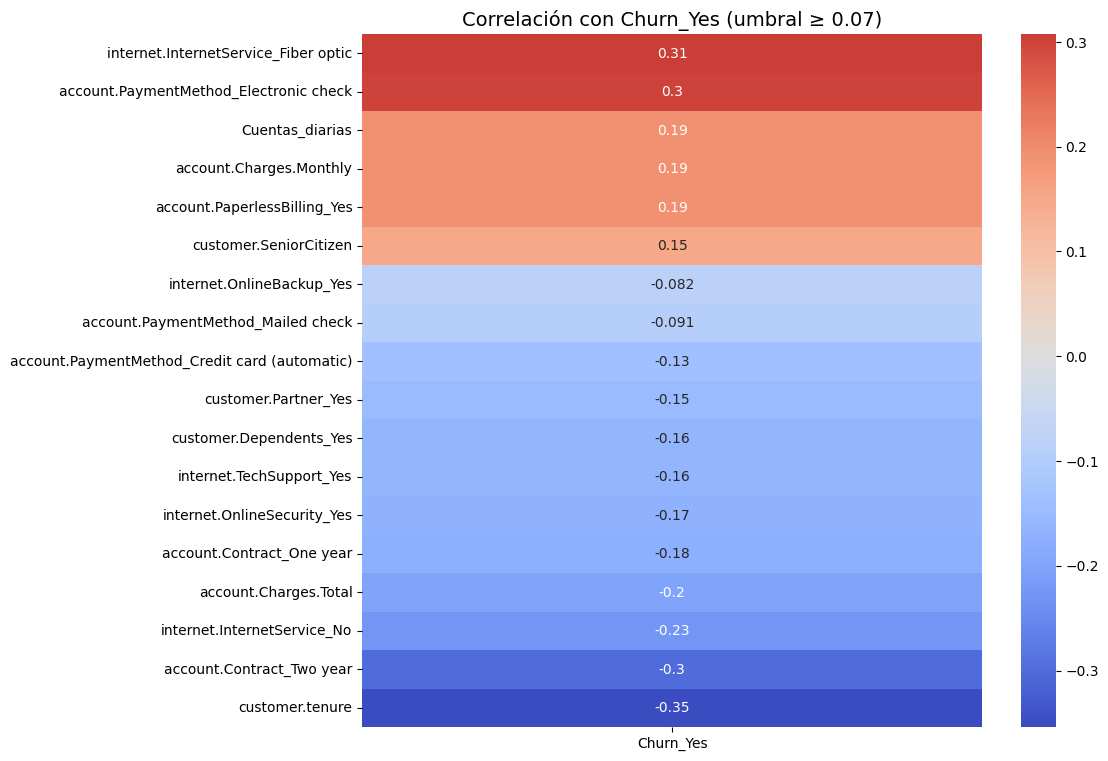

In [206]:

# Variable objetivo
target_var = 'Churn_Yes'

# Calcular matriz de correlación
corr = df_encoding_dummies.corr()

# Filtrar por correlación mínima con el target (0.07)
corr_target = corr[target_var][abs(corr[target_var]) >= 0.07]

# Quitar el target de la lista para no graficarlo consigo mismo
corr_target = corr_target.drop(target_var)

# Ordenar por mayor correlación
corr_target = corr_target.sort_values(ascending=False)

# Crear un dataframe filtrado solo con las variables relevantes
corr_filtrada = corr.loc[corr_target.index]

# Graficar heatmap
plt.figure(figsize=(10, len(corr_target) * 0.5))  # alto dinámico según cantidad de variables
sns.heatmap(corr_filtrada[[target_var]], annot=True, cmap="coolwarm", center=0)
plt.title(f"Correlación con {target_var} (umbral ≥ 0.07)", fontsize=14)
plt.show()

###**Correlación entre Variables Explicativas.**

**Niveles de correlación a tener en cuenta.**

> *  \>0.80 o <–0.80 → demasiada correlación → son redundantes → conviene dejar solo una en modelos lineales.

> * 0.50 – 0.79 → relación moderada → revisa si tiene sentido que estén juntas (ej: cargo_total vs tenure).

> * \<0.50 → aceptable, significa que cada variable aporta algo distinto.

👉 Ideal: correlaciones menores a 0.50 entre independientes → así no se pisan entre sí.

**Heatmap.**

> **Nota:**
* Para colinealidad → miramos valor absoluto.

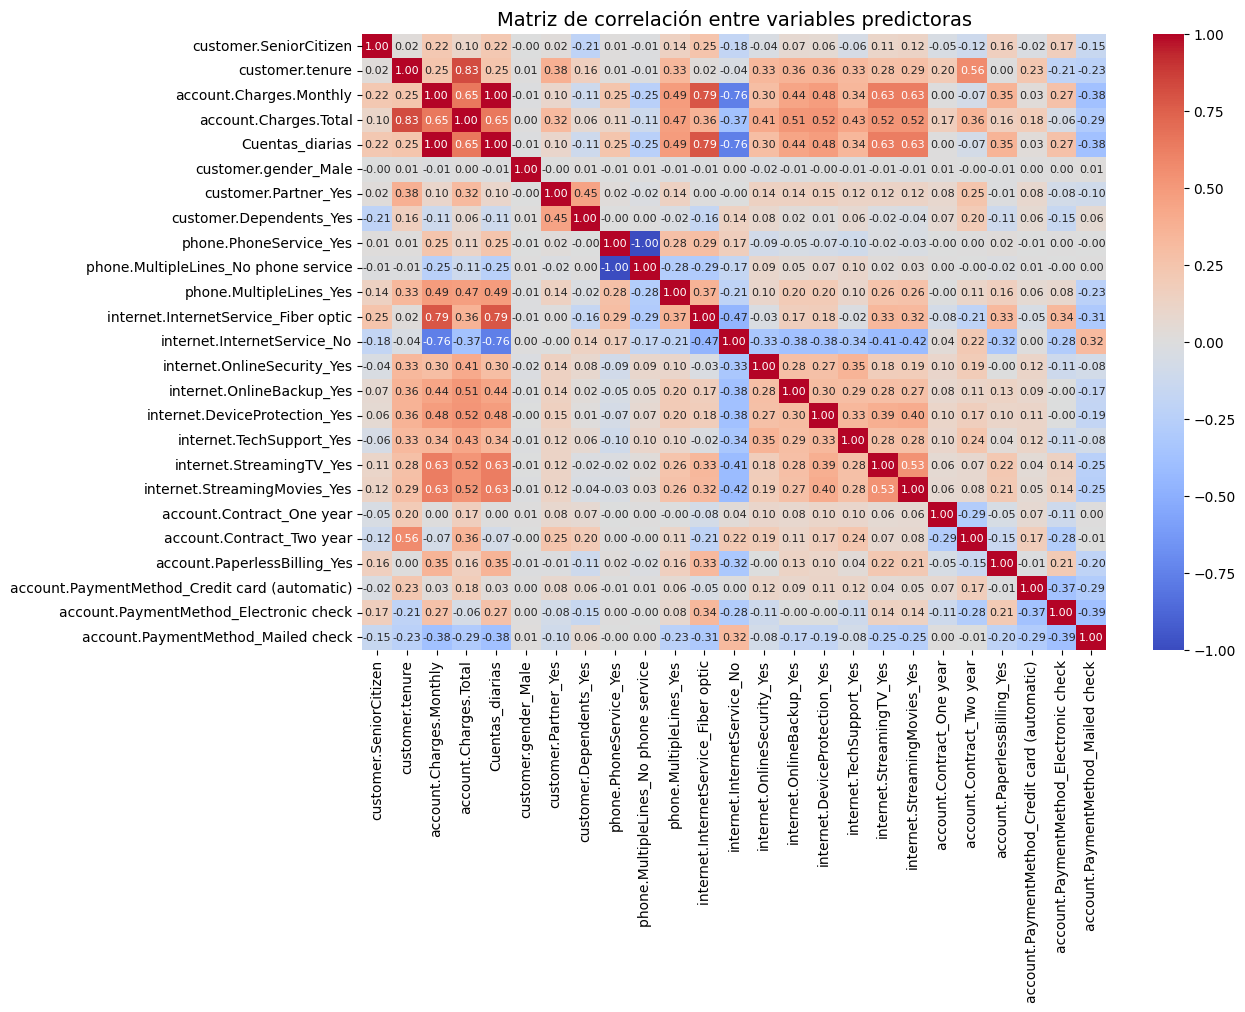

In [207]:
# Matriz de correlación solo para variables predictoras (quitamos el target)
predictoras = df_encoding_dummies.drop(columns=[target_var])
corr_matrix = predictoras.corr()

# Graficar heatmap con coeficientes
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=True,           # Mostrar los números
    fmt=".2f",            # Formato de 2 decimales
    annot_kws={"size": 8} # Tamaño del texto de los coeficientes
)
plt.title("Matriz de correlación entre variables predictoras", fontsize=14)
plt.show()


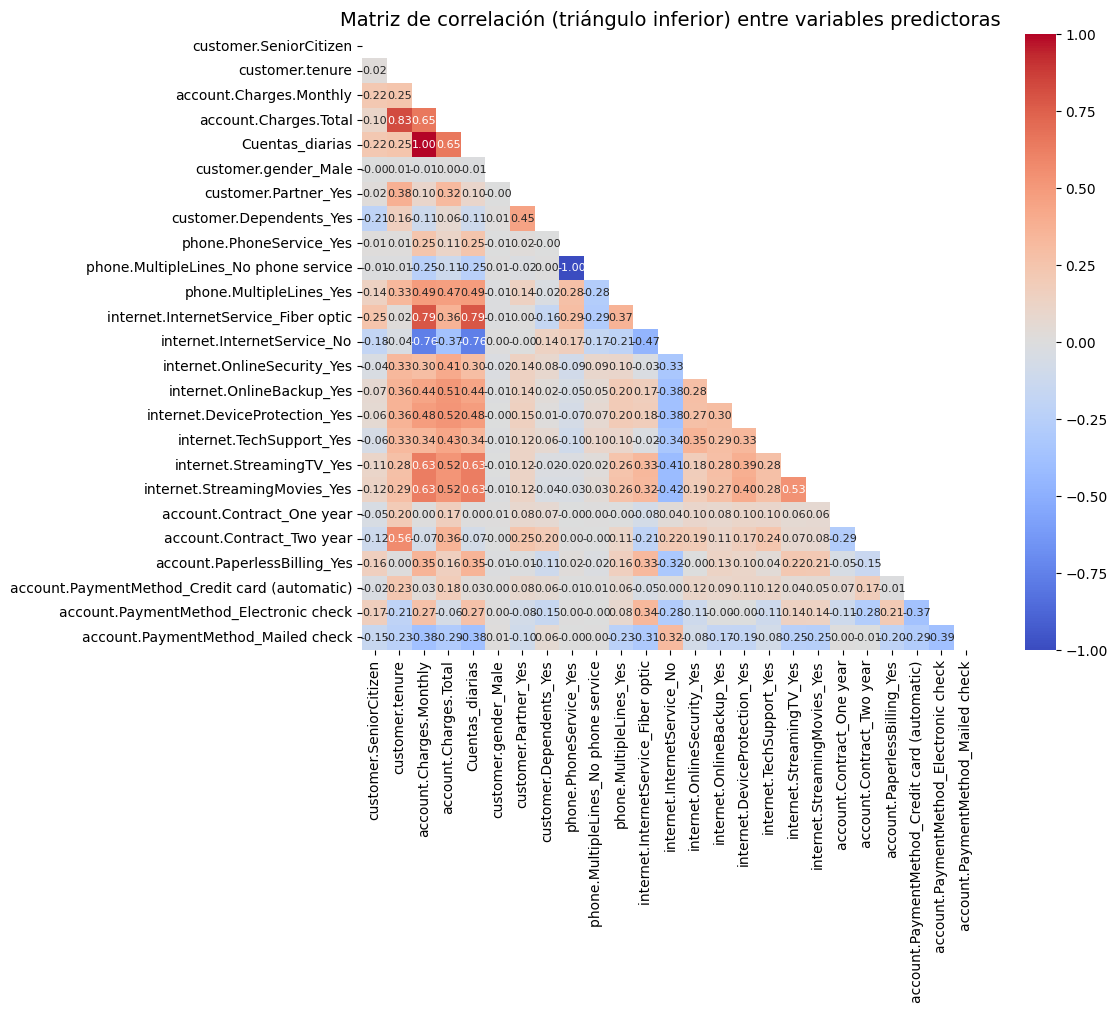

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlación entre predictoras (sin el target)
predictoras = df_encoding_dummies.drop(columns=[target_var])
corr = predictoras.corr()

# Máscara para ocultar el triángulo superior (incluye diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    mask=mask,           # ✅ solo triángulo inferior
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 8},
    square=True,         # ✅ lo deja “cuadrado partido a la mitad”
    cbar=True
)
plt.title("Matriz de correlación (triángulo inferior) entre variables predictoras", fontsize=14)
plt.show()


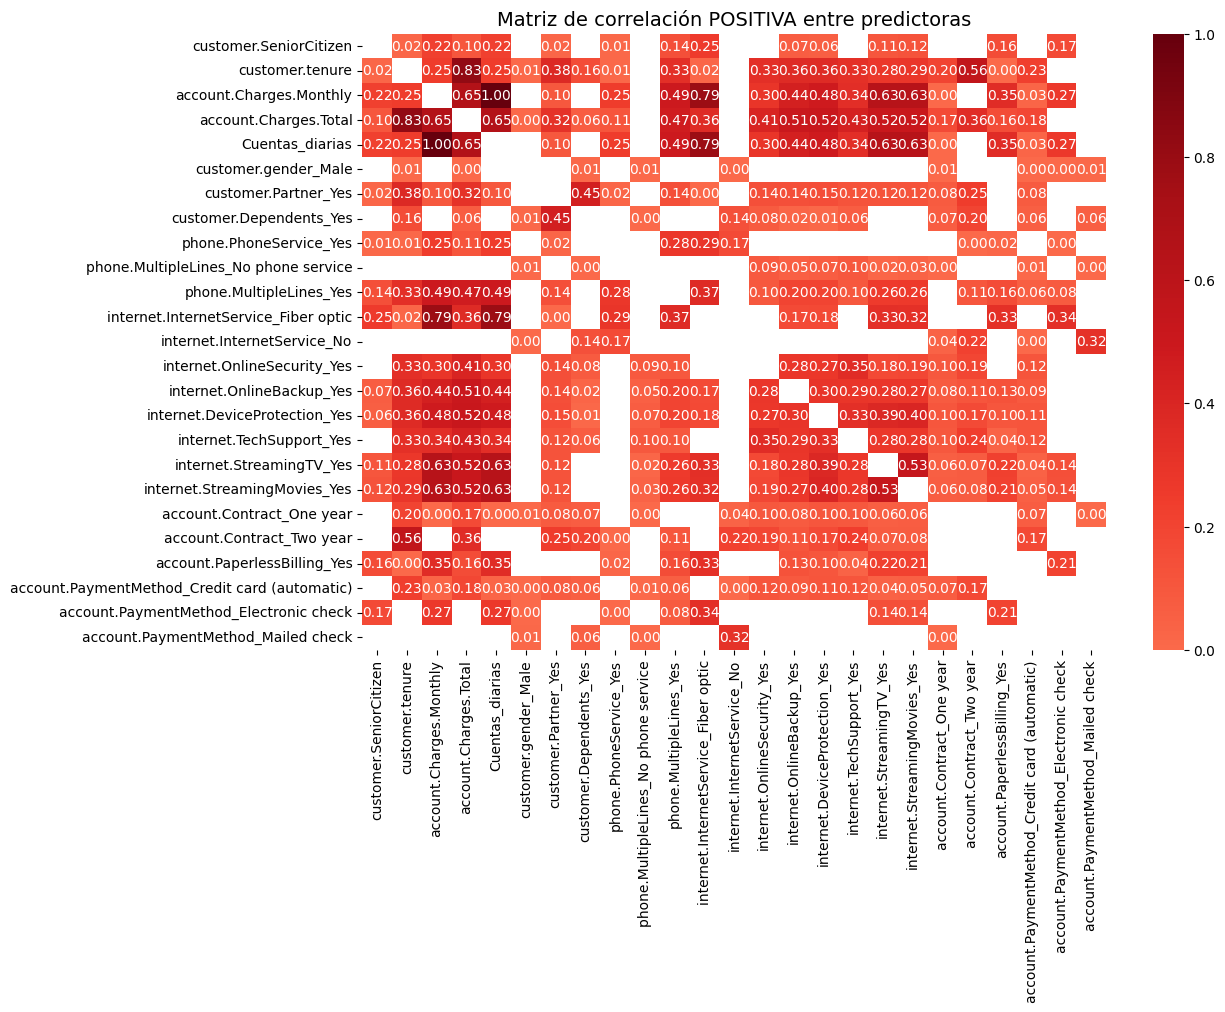

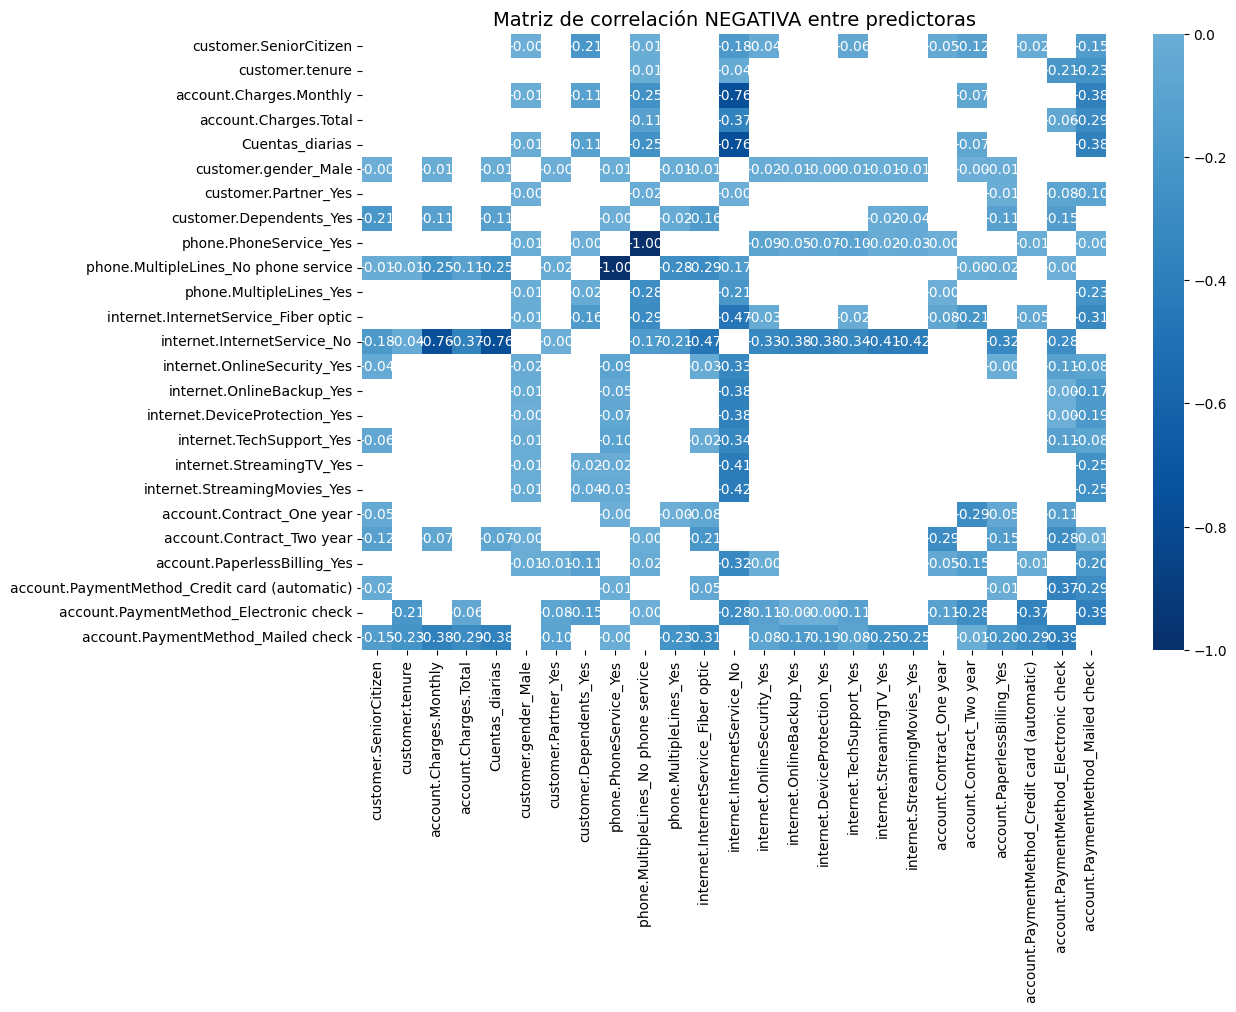

In [209]:
# Matriz de correlación entre predictoras (sin el target)
predictoras = df_encoding_dummies.drop(columns=[target_var])
corr = predictoras.corr().copy()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- POSITIVAS ---
corr_pos = corr.mask(corr <= 0)          # deja solo > 0
np.fill_diagonal(corr_pos.values, np.nan) # ocultar diagonal (opcional)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_pos, cmap="Reds", center=0, annot=True, fmt=".2f",
            vmin=0, vmax=1, cbar=True)
plt.title("Matriz de correlación POSITIVA entre predictoras", fontsize=14)
plt.show()

# --- NEGATIVAS ---
corr_neg = corr.mask(corr >= 0)           # deja solo < 0
np.fill_diagonal(corr_neg.values, np.nan) # ocultar diagonal (opcional)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_neg, cmap="Blues_r", center=0, annot=True, fmt=".2f",
            vmin=-1, vmax=0, cbar=True)
plt.title("Matriz de correlación NEGATIVA entre predictoras", fontsize=14)
plt.show()


##🔴 **Análisis Dirigído.**

### 📊 **Resumen de Comparaciones entre Variables Independientes y Target.**

**¿Qué buscar en el heatmap?**

* Cuando ves el heatmap de correlación entre todas las variables predictoras (independientes):

* Cada celda es la relación entre dos variables.

* Lo que debes mirar son las celdas con correlación muy alta en valor absoluto.

👉 Eso indica colinealidad → las dos variables están contando prácticamente la misma historia.

> **Importancia:**

> - **Correlación de variables independientes con churn (dependiente):**  dice si la variable aporta para explicar la evasión.

> - **Correlación entre variables independientes:** dice si dos variables cuentan lo mismo (colinealidad).

>**Decisión:**

> * Si dos variables son colineales, manener la que tiene mayor relación con `churn`.
> * La otra es candidata a eliminar, porque solo introducirá ruido sin aportar valor adicional.

👉 Con esta técnica de manera preliminar aseguro de quedarme con las variables relavantes y no redundantes para el modelo.

La idea es ver si las variables que más se relacionan con el churn son también muy redundantes entre ellas.

En caso afirmativo, priorizar la más significativa con el churn y descartar/transformar la otra para evitar colinealidad.

**¿Qué significa correlación entre variables independientes?**

* Una correlación mide qué tan parecidas son dos variables en su comportamiento.

* Valores cercanos a +1 → cuando una sube, la otra también sube.

* Valores cercanos a –1 → cuando una sube, la otra baja.

* Valores cercanos a 0 → no hay relación.

**Escala de correlación respecto al churn.**

* 0.30 – 0.50 (o –0.30 a –0.50) → relación moderada/fuerte. Muy útil para explicar churn.

* 0.10 – 0.29 (o –0.10 a –0.29) → relación débil a moderada. Puede aportar, pero con menos peso.

* \<0.10 (o –0.10) → relación muy débil o nula. Son candidatas a eliminar salvo que sean estratégicas (ej: telefonía).

👉 Ideal: variables con correlación ≥0.30 o ≤–0.30 con churn.
Las de 0.10–0.29 pueden quedarse si aportan en combinación con otras.

**Cuadro comparativo de correlaciones entre variables independientes y el target, para decidir cuál mantener y cuál eliminar en caso de redundancia.**

> **NOTA**:  Entre `phone.PhoneService_Yes`' y `phone.MultipleLines_No phone service` existe colinealidad perfecta (relación 1.0). Excluir del cálculo del VIF.


| Variables comparadas | Correlación entre ellas | Mantener (mayor relación con Churn) | Eliminar (menor relación con Churn) |
|-----------------------|-------------------------|-------------------------------------|-------------------------------------|
| customer.tenure ↔ account.Charges.Total | 0.83 | tenure (-0.3540) | Charges.Total (-0.1995) |
| internet.InternetService_Fiber optic ↔ account.Charges.Monthly | 0.79 | InternetService_Fiber optic (0.3075) | Charges.Monthly (0.1929) |
| account.Charges.Total ↔ account.Charges.Monthly | 0.65 | Charges.Monthly (0.1929) | Charges.Total (-0.1995) |
| internet.StreamingTV_Yes ↔ account.Charges.Monthly | 0.63 | Charges.Monthly (0.1929) | StreamingTV_Yes (0.0633) |
| internet.StreamingMovies_Yes ↔ account.Charges.Monthly | 0.63 | Charges.Monthly (0.1929) | StreamingMovies_Yes (0.0609) |
| internet.StreamingMovies_Yes ↔ internet.StreamingTV_Yes | 0.53 | StreamingTV_Yes (0.0633) | StreamingMovies_Yes (0.0609) |
| internet.StreamingMovies_Yes ↔ account.Charges.Total | 0.52 | StreamingMovies_Yes (0.0609) | Charges.Total (-0.1995) |
| internet.StreamingTV_Yes ↔ account.Charges.Total | 0.52 | StreamingTV_Yes (0.0633) | Charges.Total (-0.1995) |
| internet.OnlineBackup_Yes ↔ account.Charges.Total | 0.52 | OnlineBackup_Yes (-0.0823) | Charges.Total (-0.1995) |
| internet.StreamingTV_Yes ↔ account.Charges.Total | 0.51 | StreamingTV_Yes (0.0633) | Charges.Total (-0.1995) |
| phone.MultipleLines_Yes ↔ account.Charges.Monthly | 0.49 | Charges.Monthly (0.1929) | MultipleLines_Yes (0.0400) |
| internet.DeviceProtection_Yes ↔ account.Charges.Monthly | 0.48 | Charges.Monthly (0.1929) | DeviceProtection_Yes (-0.0662) |
| phone.MultipleLines_Yes ↔ account.Charges.Total | 0.47 | MultipleLines_Yes (0.0400) | Charges.Total (-0.1995) |
| Cuentas_diarias ↔ account.Charges.Monthly | 1.00 | Cuentas_diarias (0.19) | Caccount.Charges.Monthly (0.1995) |
| Cuentas_diarias ↔  internet.InternetService_No | 0.56 | Cuentas_diarias (0.19) | internet.InternetService_No (-0.23) |
| Cuentas_diarias ↔  internet.InternetService_Fiber optic | 0.79 | internet.InternetService_Fiber optic (0.31) | account.Charges.Total (0.1995) |
| Cuentas_diarias ↔  internet.StreamingTV_Yes | 0.63 | Cuentas_diarias (0.1995) | internet.StreamingTV_Yes (0.0633) |
| Cuentas_diarias ↔  internet.StreamingMovies_Yes | 0.63 | Cuentas_diarias (0.1995) |  internet.StreamingMovies_Yes (0.0609) |
| internet.StreamingTV_Yes ↔  internet.StreamingMovies_Yes | 0.53 | N/A |  Ambas |
| phone.MultipleLines_No phone service ↔  phone.PhoneService_Yes | -1.00 | N/A | Ambas |


📌 Variables con Relación Directa con Churn.

| Variables comparadas                                               | Correlación | Mantener (mayor relación con Churn)                                                                 | Eliminar (menor relación)                |
| ------------------------------------------------------------------ | ----------- | --------------------------------------------------------------------------------------------------- | ---------------------------------------- |
| `internet.InternetService_Fiber optic` – `account.Charges.Monthly` | 0.79        | ✅ `internet.InternetService_Fiber optic` (0.307)                                                    | ❌ `account.Charges.Monthly` (0.193)      |
| `internet.StreamingTV_Yes` – `account.Charges.Monthly`             | 0.63        | ✅ `account.Charges.Monthly` (0.193)                                                                 | ❌ `internet.StreamingTV_Yes` (0.063)     |
| `internet.StreamingMovies_Yes` – `account.Charges.Monthly`         | 0.63        | ✅ `account.Charges.Monthly` (0.193)                                                                 | ❌ `internet.StreamingMovies_Yes` (0.061) |
| `internet.StreamingMovies_Yes` – `internet.StreamingTV_Yes`        | 0.53        | ⚠️ Ambas tienen relación débil; mantener solo una (ligera ventaja `internet.StreamingTV_Yes` 0.063) | ❌ `internet.StreamingMovies_Yes` (0.061) |
| `phone.MultipleLines_Yes` – `account.Charges.Monthly`              | 0.49        | ✅ `account.Charges.Monthly` (0.193)                                                                 | ❌ `phone.MultipleLines_Yes` (0.040)      |
| `Cuentas_diarias` – `internet.InternetService_Fiber optic`        | **0.79**                                  | ✅ `internet.InternetService_Fiber optic` (0.31)                                    | ❌ `Cuentas_diarias` (0.19)                |
| `Cuentas_diarias` – `internet.StreamingTV_Yes`                    | **0.63**                                  | ✅ `Cuentas_diarias` (0.1995)                                                       | ❌ `internet.StreamingTV_Yes` (0.0633)     |
| `Cuentas_diarias` – `internet.StreamingMovies_Yes`                | **0.63**                                  | ✅ `Cuentas_diarias` (0.1995)                                                       | ❌ `internet.StreamingMovies_Yes` (0.0609) |
| `internet.StreamingTV_Yes` – `internet.StreamingMovies_Yes`       | **0.53**                                  | ➡️ Mantener en modelo explicativo | En modelos predictivos eliminar y usar `Cuentas_diarias`                                        |
| `phone.MultipleLines_No phone service` – `phone.PhoneService_Yes` | **–1.00 (correlación perfecta)** | ➡️ Mantener solo **una**, son totalmente redundantes                               | —                                         |


📌 Variables con Relación Inversa con Churn.

| Variables comparadas                                        | Correlación | Mantener (mayor relación con Churn) | Eliminar (menor relación)                  |
| ----------------------------------------------------------- | ----------- | ----------------------------------- | ------------------------------------------ |
| `customer.tenure` – `account.Charges.Total`                 | 0.83        | ✅ `customer.tenure` (-0.354)        | ❌ `account.Charges.Total` (-0.199)         |
| `account.Charges.Total` – `account.Charges.Monthly`         | 0.65        | ✅ `account.Charges.Total` (-0.199)  | ❌ `account.Charges.Monthly` (+0.193)       |
| `internet.StreamingMovies_Yes` – `account.Charges.Total`    | 0.52        | ✅ `account.Charges.Total` (-0.199)  | ❌ `internet.StreamingMovies_Yes` (0.061)   |
| `internet.StreamingTV_Yes` – `account.Charges.Total`        | 0.52        | ✅ `account.Charges.Total` (-0.199)  | ❌ `internet.StreamingTV_Yes` (0.063)       |
| `internet.OnlineBackup_Yes` – `account.Charges.Total`       | 0.52        | ✅ `account.Charges.Total` (-0.199)  | ❌ `internet.OnlineBackup_Yes` (-0.082)     |
| `internet.StreamingTV_Yes` – `account.Charges.Total`        | 0.51        | ✅ `account.Charges.Total` (-0.199)  | ❌ `internet.StreamingTV_Yes` (0.063)       |
| `internet.DeviceProtection_Yes` – `account.Charges.Monthly` | 0.48        | ✅ `account.Charges.Monthly` (0.193) | ❌ `internet.DeviceProtection_Yes` (-0.066) |
| `phone.MultipleLines_Yes` – `account.Charges.Total`         | 0.47        | ✅ `account.Charges.Total` (-0.199)  | ❌ `phone.MultipleLines_Yes` (0.040)        |
| `Cuentas_diarias` – `account.Charges.Monthly`     | **1.00**    | ✅ `account.Charges.Monthly` (0.193, directa con churn) | ❌ `Cuentas_diarias` (0.190, directa pero un poco menor) |
| `Cuentas_diarias` – `internet.InternetService_No` | **0.56**    | ✅ `internet.InternetService_No` (**–0.23**)            | ❌ `Cuentas_diarias` (0.19)                              |


**Interpretación:**

- **Columna Mantener:** variables con mayor fuerza de correlación respecto al churn (✅).

- **Columna Eliminar o descartar:** variables con correlación más débil en cada par (❌).

- En los casos donde ambas son muy bajas, se sugiere mantener solo una para evitar redundancia y multicolinealidad.(⚠️)

➡️ No tienen peso estadístio para establecer relación con el churn, dado que son muy parecidas; la decisión dependerá del modelo.

> **Notas:**

* El par Cuentas_diarias – account.Charges.Monthly es colinealidad casi perfecta (1.00), no deben ir juntas; podés quedarte solo con una.

* Fiber optic tiene más peso que Cuentas_diarias, así que mejor mantenerla.

* En servicios de streaming (TV y Movies) la relación con churn es débil, por lo que Cuentas_diarias tiene más valor relativo.

* En telefonía, las dos columnas son redundantes: se debe mantener solo una.

---

##🔴**Análisis de Multicoliniaridad.**

In [210]:
df_encoding_dummies.columns

Index(['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly',
       'account.Charges.Total', 'Cuentas_diarias', 'Churn_Yes',
       'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_Yes', 'internet.TechSupport_Yes',
       'internet.StreamingTV_Yes', 'internet.StreamingMovies_Yes',
       'account.Contract_One year', 'account.Contract_Two year',
       'account.PaperlessBilling_Yes',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')

In [211]:
df_encoding_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7032 non-null   int64  
 1   customer.tenure                                7032 non-null   int64  
 2   account.Charges.Monthly                        7032 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   Cuentas_diarias                                7032 non-null   float64
 5   Churn_Yes                                      7032 non-null   bool   
 6   customer.gender_Male                           7032 non-null   bool   
 7   customer.Partner_Yes                           7032 non-null   bool   
 8   customer.Dependents_Yes                        7032 non-null   bool   
 9   phone.PhoneService_Yes                         7032 non-n

1. Importar las bibliotecas necesarias

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler

2. Copiar df con codificación numérica(get_dummies).

In [213]:
#Copia para no modificar datos originales.
df_encoding_dummies_copy = df_encoding_dummies.copy()

3. Seleccionar las variables independientes.

In [214]:
#Segundo VIF.
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
# No incluimos variables con colinealidad perfecta según healtmap "phone.PhoneService y MultipleLines"
x = df_encoding_dummies_copy.drop(columns=['Churn_Yes','internet.InternetService_No','phone.MultipleLines_No phone service',
                                           'account.Charges.Total','account.Charges.Monthly',
                                           'phone.MultipleLines_Yes','internet.StreamingTV_Yes','internet.TechSupport_Yes',
                                           'internet.StreamingMovies_Yes','internet.OnlineBackup_Yes', 'internet.OnlineSecurity_Yes',
                                           'account.PaymentMethod_Mailed check','internet.DeviceProtection_Yes','customer.gender_Male'])

x = x.astype(float)

In [215]:
#Primer VIF.
"""
#VIF para modelos lineales.
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
# No incluimos variables con colinealidad perfecta según healtmap "phone.PhoneService y MultipleLines"
X = df_encoding_dummies_copy.drop(columns=['Churn_Yes','internet.InternetService_No','phone.MultipleLines_No phone service',
                                           'Cuentas_diarias',
                                           'phone.MultipleLines_Yes','internet.StreamingTV_Yes',
                                           'internet.StreamingMovies_Yes','internet.OnlineBackup_Yes',
                                           'account.PaymentMethod_Mailed check','internet.DeviceProtection_Yes','customer.gender_Male'])

X = X.astype(float)
"""

'\n#VIF para modelos lineales.\n# Aquí, no incluyas la variable objetivo (ej: Churn\\_Yes) en el cálculo del VIF.\n# No incluimos variables con colinealidad perfecta según healtmap "phone.PhoneService y MultipleLines"\nX = df_encoding_dummies_copy.drop(columns=[\'Churn_Yes\',\'internet.InternetService_No\',\'phone.MultipleLines_No phone service\',\n                                           \'Cuentas_diarias\',\n                                           \'phone.MultipleLines_Yes\',\'internet.StreamingTV_Yes\',\n                                           \'internet.StreamingMovies_Yes\',\'internet.OnlineBackup_Yes\',\n                                           \'account.PaymentMethod_Mailed check\',\'internet.DeviceProtection_Yes\',\'customer.gender_Male\'])\n\nX = X.astype(float)\n'

In [216]:
x_const = add_constant(x)

5. Calcular el VIF.

In [217]:
# Calcular el VIF sin incluir la columna 'const'
vif_data = pd.DataFrame()
vif_data["feature"] = x_const.columns[1:]  # ignoramos la primera columna 'const'
vif_data["VIF"] = [variance_inflation_factor(x_const.values, i+1)
                   for i in range(x_const.shape[1]-1)]

display(vif_data.sort_values(by='VIF', ascending=False))


,feature,VIF
2,Cuentas_diarias,3.235915
6,internet.InternetService_Fiber optic,3.137023
1,customer.tenure,2.446427
8,account.Contract_Two year,2.406636
7,account.Contract_One year,1.544575
3,customer.Partner_Yes,1.459090
11,account.PaymentMethod_Electronic check,1.437879
4,customer.Dependents_Yes,1.377481
10,account.PaymentMethod_Credit card (automatic),1.212490
9,account.PaperlessBilling_Yes,1.194247


> 👉**NOTA:**
>  **El VIF:**  mide cuánto una variable se explica por todas las demás en conjunto. Detecta casos en que una variable no depende solo de otra, sino de una combinación de varias.

> **Análisis de resultados.**

💡 Regla práctica para modelos lineales:

 - <= 1 no existe multicoliniaridad.
 - VIF ≤ 5 → seguro.

 - 5 < VIF ≤ 10 → revisar, pero podría usarse.

 - VIF > 10 → alto riesgo → evaluar eliminar o transformar.


 - INF significa infinito y se interpreta como colinealidad perfecta. Una variable está perfectamente explicada por una o más variables del conjunto.
 En otras palabras esa variables es una combinación lineal exacta de otras. Y eso se traduce que hemos introducido 2 variables que en realidad contienen la misma información. Puede que esté duplicada o que una variable se calcula a partir de otra.

 ¿Qué hacer?
 - Debemos buscar el par de variables que que están duplicando la información.
 - Elimiar una de las variables redundantes.
 - Si es por variable dummy aplicar drop_first= True en pd.get_dummies()

**OJO**

Un VIF alto indica que el modelo podría tener problemas para estimar correctamente los coeficientes, porque esa variable está “inflando” la varianza debido a su redundancia con otras.

No siempre es malo si se usan modelos no lineales (árboles, random forest, XGBoost), porque estos modelos no asumen independencia entre predictores.

Pero si tu objetivo es interpretar coeficientes o usas un modelo lineal, sí conviene manejarlo.

**Resultado del primer VIF.**

| Variable                                | VIF      | Recomendación                                   | Implicancia en el modelo |
|-----------------------------------------|----------|-------------------------------------------------|--------------------------|
| account.Charges.Monthly                 | 35.34    | **Eliminar o transformar** (muy alta colinealidad con cargo total) | Redundancia fuerte; puede distorsionar coeficientes en modelos lineales/regresión logística. |
| account.Charges.Total                   | 10.81    | Revisar / posible **eliminación**               | Muy correlacionada con mensual y antigüedad; mantenerla puede causar inestabilidad. |
| internet.InternetService_Fiber optic    | 10.12    | Revisar / posible reducción                     | Alta colinealidad con otras categorías de InternetService. |
| customer.tenure                         | 7.58     | Aceptable pero **vigilar**                      | Moderada correlación con cargos totales. Puede dejarse, pero chequear junto a variables de cargos. |
| internet.InternetService_No             | 4.85     | Mantener                                        | Valor razonable; diferencia informativa frente a fibra/DSL. |
| account.Contract_Two year               | 2.65     | Mantener                                        | Sin riesgo de colinealidad relevante. |
| internet.StreamingTV_Yes                | 2.45     | Mantener                                        | Sin problema. |
| internet.StreamingMovies_Yes            | 2.43     | Mantener                                        | Sin problema. |
| account.PaymentMethod_Electronic check  | 1.98     | Mantener                                        | Bajo riesgo. |
| phone.MultipleLines_Yes                 | 1.93     | Mantener                                        | Bajo riesgo. |
| account.PaymentMethod_Mailed check      | 1.86     | Mantener                                        | Bajo riesgo. |
| internet.TechSupport_Yes                | 1.74     | Mantener                                        | Bajo riesgo. |
| internet.DeviceProtection_Yes           | 1.69     | Mantener                                        | Bajo riesgo. |
| internet.OnlineSecurity_Yes             | 1.68     | Mantener                                        | Bajo riesgo. |
| internet.OnlineBackup_Yes               | 1.64     | Mantener                                        | Bajo riesgo. |
| account.Contract_One year               | 1.63     | Mantener                                        | Bajo riesgo. |
| account.PaymentMethod_Credit card (automatic) | 1.56 | Mantener                                        | Bajo riesgo. |
| customer.Partner_Yes                    | 1.46     | Mantener                                        | Bajo riesgo. |
| customer.Dependents_Yes                 | 1.38     | Mantener                                        | Bajo riesgo. |
| account.PaperlessBilling_Yes            | 1.21     | Mantener                                        | Sin problema. |
| customer.SeniorCitizen                  | 1.15     | Mantener                                        | Sin problema. |
| customer.gender_Male                    | 1.00     | Mantener                                        | Sin problema. |


>✅ **Conclusión práctica.**

>No usar en simultáneo: account.Charges.Monthly, cargo_total, Cuentas_diarias
>→ porque son derivadas unas de otras y aportan lo mismo.
> * Elegir solo una.

> **Decisión.** quedarnos con:
>* customer.tenure (variable temporal de permanencia)
>* Cuentas_diarias (versión normalizada del gasto).

>  ¿Por qué Cuentas_diarias y no Monthly?
👉 Porque es una métrica económica normalizada. Permite:
>* Comparar más fácil entre clientes con distinta antigüedad.
>* Recalcular Monthly y Total si en un análisis explicativo posterior lo necesitas.
>* Reducir redundancia y mantener la interpretabilidad de forma indirecta.


* **Recomendación:** Recalcular el VIF aplicando los hallazgos de la correlación entre variables y EDA.

----

⚪ **Resultado del segundo VIF.**

| Variable                                        | VIF   | Recomendación                                                         | Implicancia en el modelo                                                                               |
| ----------------------------------------------- | ----- | --------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| `Cuentas_diarias`                               | 3.236 | Mantener, valor aceptable (< 5).                                      | Variable económica normalizada; reemplaza a `cargo_mensual` y `cargo_total`, aporta interpretabilidad. |
| `internet.InternetService_Fiber optic`          | 3.137 | Mantener, pero vigilar (posible correlación con servicios asociados). | Relevante: se asocia fuertemente al churn (+). Puede redundar con servicios como seguridad/soporte.    |
| `customer.tenure`                               | 2.446 | Mantener, valor bajo.                                                 | Variable temporal clave, inversa al churn (clientes antiguos desertan menos).                          |
| `account.Contract_Two year`                     | 2.407 | Mantener, valor bajo.                                                 | Alta retención; contratos largos muestran menor churn.                                                 |
| `account.Contract_One year`                     | 1.545 | Mantener.                                                             | Contratos medianos, valor predictivo moderado.                                                         |
| `customer.Partner_Yes`                          | 1.459 | Mantener.                                                             | Clientes con pareja desertan menos. Factor demográfico relevante.                                      |
| `account.PaymentMethod_Electronic check`        | 1.438 | Mantener.                                                             | Alta relación con churn; marcador de digitalización incompleta.                                        |
| `customer.Dependents_Yes`                       | 1.377 | Mantener.                                                             | Clientes con dependientes desertan menos. Factor demográfico complementario.                           |
| `account.PaymentMethod_Credit card (automatic)` | 1.212 | Mantener.                                                             | Métodos automáticos suelen estar asociados a menor churn.                                              |
| `account.PaperlessBilling_Yes`                  | 1.194 | Mantener.                                                             | Asociado positivamente al churn; marcador de contrato mensual.                                         |
| `customer.SeniorCitizen`                        | 1.143 | Mantener.                                                             | Variable demográfica con efecto débil pero estable.                                                    |
| `phone.PhoneService_Yes`                        | 1.129 | Mantener.                                                             | Relación débil; aporta control de segmento.                                                            |


>📌 **Conclusión práctica del VIF recalculado:**

> Todas las variables están por debajo de 5 → no hay riesgo serio de multicolinealidad.
> Las más altas (Cuentas_diarias y internet.Fiber optic) son muy relevantes para el churn, por lo que se mantienen.
> Este set es apto tanto para modelos lineales como no lineales.

---

In [218]:
"""
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

# Mostrando los datos normalizados
dados.head()


"""

"\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)\ncolunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns\n\n# Inicializando el scaler\nscaler = MinMaxScaler()\n\n# Aplicando la normalización\ndados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])\n\n# Mostrando los datos normalizados\ndados.head()\n\n\n"

> ✅ La normalización/estandarización sirve para que Cuentas_diarias (que está en valores monetarios y con mayor dispersión que, por ejemplo, tenure) no domine el cálculo en modelos sensibles a la escala (KNN, SVM, regresión logística, redes neuronales).

# 🤖 **Modelos Predictivos.**

##🟣 **BaseLine.**

In [219]:
from sklearn.dummy import DummyClassifier

In [220]:
#Modelo Dummy.
modelo_dummy = DummyClassifier()
modelo_dummy.fit(X_train, y_train)

modelo_dummy.score(X_test, y_test)

0.7341862117981521

##🟣 **Regresión Logística.**

##🟣 **Árbol de decisión simple.**

In [221]:
from sklearn.tree import DecisionTreeClassifier

In [222]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

**Modelo sin balanceo**

In [224]:
modelo_arbol = DecisionTreeClassifier(max_depth=3,random_state=5)
modelo_arbol.fit(X_train_enc,y_train )

DecisionTreeClassifier(max_depth=3, random_state=5)

In [225]:
modelo_arbol.score(X_test_enc, y_test)

0.7917555081734187

Modelo con balanceo.

In [226]:
#Árbol entrenado con SMOTE (X_train_bal, y_train_bal)
tree_sm = DecisionTreeClassifier(max_depth=7,random_state=5)
tree_sm.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(max_depth=7, random_state=5)

In [227]:
# 2) Evaluación en TEST real (¡no balancear test!)
y_pred = tree_sm.predict(X_test_enc)
y_prob = tree_sm.predict_proba(X_test_enc)[:, 1]

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 3))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["No churn","Churn"], digits=3))


Accuracy: 0.748
ROC AUC: 0.828
[[772 261]
 [ 93 281]]
              precision    recall  f1-score   support

    No churn      0.892     0.747     0.813      1033
       Churn      0.518     0.751     0.614       374

    accuracy                          0.748      1407
   macro avg      0.705     0.749     0.714      1407
weighted avg      0.793     0.748     0.760      1407



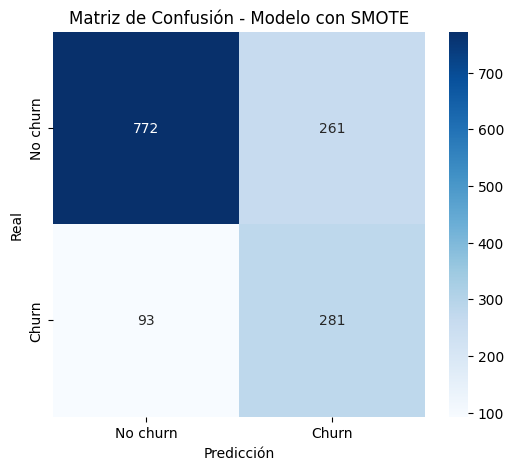

In [228]:
# Valores reales (y_test) y predicciones (y_pred)
# Asegúrate de tenerlos definidos en tu notebook antes de correr esto
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No churn', 'Churn'],
            yticklabels=['No churn', 'Churn'])

plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Modelo con SMOTE')
plt.show()


**Lectura de la Matríz de Confusión.**

>  Eje vertical (Real): lo que pasó en la realidad.

>  Eje horizontal (Predicción): lo que predijo el modelo.

**Datos.**

* 772: No churn bien clasificados.

* 261: No churn mal clasificados como churn (falsos positivos).

* 93: Churn mal clasificados como no churn (falsos negativos).

* 281: Churn bien clasificados (verdaderos positivos).



**Métricas clave.**

* **Accuracy** = 0.748 (75%) →  de aciertos globales. Menor que antes, pero más balanceado.

* **ROC AUC** = 0.828 (83%)→ bastante alto. Significa que el modelo discrimina bien entre churn y no churn.

* **Recall churn** = 0.751 (75%) → ¡gran mejora! El modelo detecta 3 de cada 4 clientes que realmente desertan.

* **Precision churn** = 0.518 (52%) → de cada 10 clientes que el modelo dice que van a desertar, 5 efectivamente lo hacen.

* **F1 churn = 0.614** → equilibrio entre precisión y recall, razonable dado el trade-off.

**Conclusión.**

✅ Si lo que importa es retener clientes (detectar churn), el modelo con SMOTE es mejor.

⚠️ Pero si lo que importa es no molestar clientes fieles con falsas alarmas, habría que ajustar el umbral o buscar un modelo más fino (p. ej. Random Forest, Gradient Boosting).

**Recomendación**

📌 **Recall de Churn es muy bueno.** Si se quiere mejorar la precisión (para reducir falsos positivos), hay que ajustar el threshold de decisión. (no usar 0.5)

>La idea es priorizar recall en la clase “Churn” (evasores), porque:
>Un falso negativo (evasor clasificado como no evasor) es más costoso para la empresa → pierdes un cliente sin haberlo identificado.
>Un falso positivo (cliente que no se iba pero lo clasificaste como evasor) es menos grave → la empresa puede gastar algo en retenerlo, pero no pierde al cliente.
>En otras palabras, bajar un poco la precisión en “no churn” para ganar más recall en “churn” suele ser un buen trade-off en este tipo de problemas.

##🟣 **Random Forest.**

In [229]:
#Importando bibliotecas.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report,RocCurveDisplay

**Modelo sin balanceo**

In [230]:
# ---------- Random Forest SIN balanceo de muestras ----------
random_forest = RandomForestClassifier(
    n_estimators=400, max_depth=None, min_samples_split=2, min_samples_leaf=1,
    random_state=42, n_jobs=-1
)
random_forest.fit(X_train_enc, y_train)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [231]:
##Evaluar el modelo.
y_pred_rm = random_forest.predict(X_test_enc)
y_proba_rm = random_forest.predict_proba(X_test_enc)[:, 1]

In [232]:
# Métricas
acc = accuracy_score(y_test, y_pred_rm)
auc = roc_auc_score(y_test, y_proba_rm)
#Visualizar.
print("Accuracy:", acc)
print("ROC AUC:", auc)
print(confusion_matrix(y_test, y_pred_rm))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rm, target_names=["No churn","Churn"], digits=3))

Accuracy: 0.7924662402274343
ROC AUC: 0.82842662718524
[[930 103]
 [189 185]]

Classification report:
              precision    recall  f1-score   support

    No churn      0.831     0.900     0.864      1033
       Churn      0.642     0.495     0.559       374

    accuracy                          0.792      1407
   macro avg      0.737     0.697     0.712      1407
weighted avg      0.781     0.792     0.783      1407



**Modelo con balanceo.**

In [233]:
# ---------- Random Forest CON SMOTE (entrenado en X_train_bal, y_train_bal) ----------
random_forest_sm = RandomForestClassifier(
    n_estimators=400, max_depth=None, min_samples_split=2, min_samples_leaf=1,
    random_state=42, n_jobs=-1
)
random_forest_sm.fit(X_train_bal, y_train_bal)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [234]:
##Evaluar el modelo.
y_pred_rm_sm = random_forest_sm.predict(X_test_enc)
y_proba_rm_sm = random_forest_sm.predict_proba(X_test_enc)[:, 1]

In [235]:
# Métricas
acc = accuracy_score(y_test, y_pred_rm_sm)
auc = roc_auc_score(y_test, y_proba_rm_sm)
#Visualizar.
print("Accuracy:", acc)
print("ROC AUC:", auc)
print(confusion_matrix(y_test, y_pred_rm_sm))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rm_sm, target_names=["No churn","Churn"], digits=3))

Accuracy: 0.7803837953091685
ROC AUC: 0.8262161504573667
[[871 162]
 [147 227]]

Classification report:
              precision    recall  f1-score   support

    No churn      0.856     0.843     0.849      1033
       Churn      0.584     0.607     0.595       374

    accuracy                          0.780      1407
   macro avg      0.720     0.725     0.722      1407
weighted avg      0.783     0.780     0.782      1407



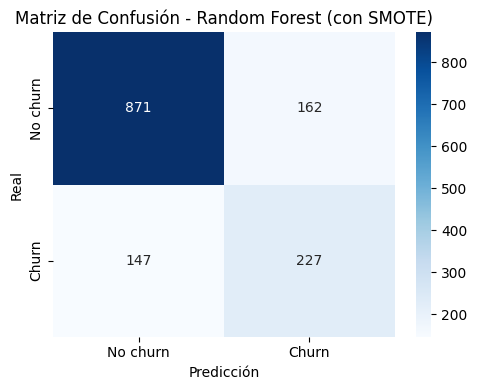

In [236]:
#Código para matriz de confusión.
# ---- Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rm_sm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No churn","Churn"], yticklabels=["No churn","Churn"])
plt.title("Matriz de Confusión - Random Forest (con SMOTE)")
plt.xlabel("Predicción"); plt.ylabel("Real")
plt.tight_layout(); plt.show()

**Datos.**

* 871: No churn bien clasificados.

* 162: No churn mal clasificados como churn (falsos positivos).

* 147: Churn mal clasificados como no churn (falsos negativos).

* 227: Churn bien clasificados (verdaderos positivos).

**Métricas clave.**

* **Accuracy** = 0.780 (78%) el modelo acierta globalmente en 8 de cada 10 clientes, mejorando al árbol simple.

* **ROC AUC** = 0.826 (82.6%) lo que confirma buena capacidad de discriminación entre clientes que desertan y los que permanecen.

* **Recall churn** = 0.607 (61%) el modelo identifica 2.4 de cada 4 evasores. Aunque es mejor que el árbol simple sin balanceo, sigue siendo bajo respecto al objetivo de negocio.

* **Precision churn** = 0.584 (58.4%) de cada 10 clientes clasificados como churn, casi 6 realmente lo son.

* **F1 churn = 0.595 (60%) razonable, pero muestra que el modelo aún no logra equilibrio fuerte entre recall y precisión.

**Conclusión.**

✅ Fortaleza: el Random Forest mejora la discriminación global (AUC) y da más estabilidad que el árbol simple.

⚠️ Debilidad: todavía pierde muchos clientes que desertan (recall relativamente bajo).

**Recomendación**

📌 **Ajustar el umbral de decisión (threshold):** no quedarse con 0.5, sino probar con valores menores (ej. 0.3–0.4) para aumentar el recall de churn.

📌 **Optimizar hiperparámetros:** explorar número de árboles, profundidad máxima y class_weight="balanced", lo que puede mejorar el recall sin sacrificar demasiado la precisión.

📌 **Probar otros modelos de ensamble:** Gradient Boosting (XGBoost, LightGBM, CatBoost) suelen capturar mejor los patrones de churn.

📌 **Analizar features más influyentes:** ver qué variables están siendo más determinantes en el Random Forest para reforzar la interpretación del modelo y ajustar datos/transformaciones.

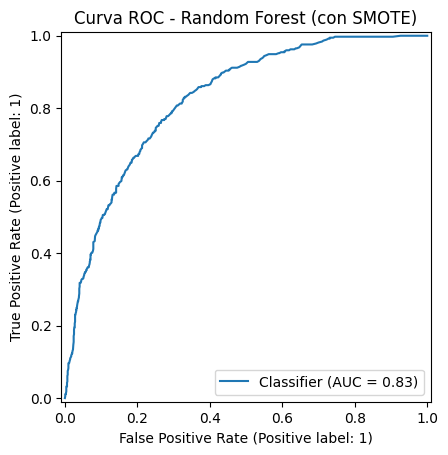

In [237]:
# ---- Curva ROC
RocCurveDisplay.from_predictions(y_test, y_proba_rm_sm)
plt.title("Curva ROC - Random Forest (con SMOTE)")
plt.show()

#📋 **Interpretación y Conclusiones.**

**Análisis de la Importancia de las Variables.**

🟠 **Interpretaciones para resultados de Árbol de decisión simple.**

📊  Resumen de Incidencia de Variable dentro del Modelo Árbol de Decisión Simple.

                                  Variable  Importancia
3                account.Contract_Two year     0.338788
2                account.Contract_One year     0.270984
11                         customer.tenure     0.105457
0     internet.InternetService_Fiber optic     0.096827
19                internet.StreamingMovies     0.042480
18                    internet.StreamingTV     0.017597
20                account.PaperlessBilling     0.016037
5   account.PaymentMethod_Electronic check     0.015698
12                      phone.PhoneService     0.014991
23                         Cuentas_diarias     0.014771



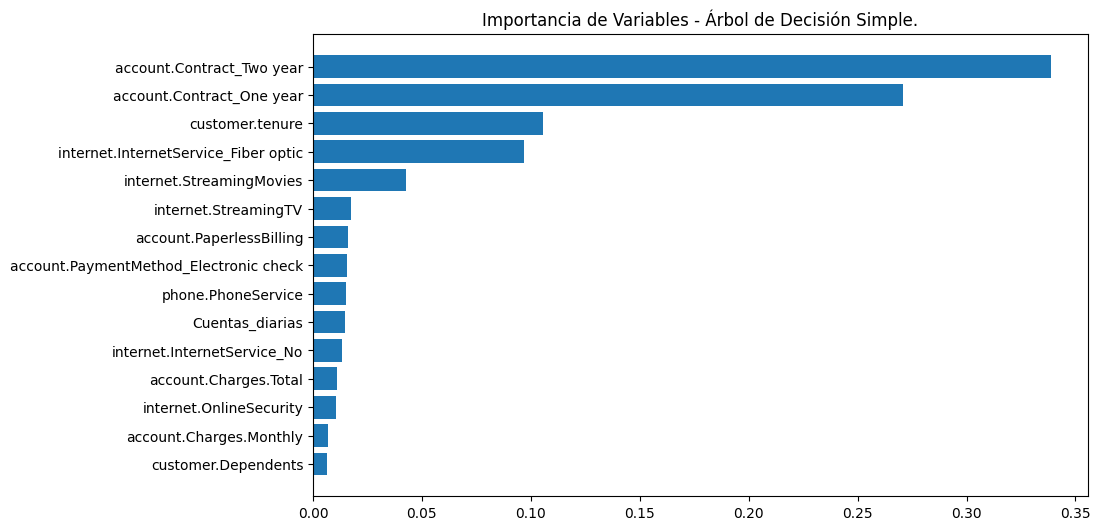

In [249]:
# Importancia de variables desde tu modelo entrenado Árbol de decisión simple.
importancias = tree_sm.feature_importances_

# Asociar con nombres de las columnas usadas en el entrenamiento balanceado
variables = X_train_bal.columns
df_importancia = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar las 10 más importantes
print(f'📊  Resumen de Incidencia de Variable dentro del Modelo Árbol de Decisión Simple.\n')
print(df_importancia.head(10))
print()


# 📊 Gráfico
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Variable'][:15], df_importancia['Importancia'][:15])
plt.gca().invert_yaxis()
plt.title("Importancia de Variables - Árbol de Decisión Simple.")
plt.show()


🟠 **Interpretaciones para resultados de Random Forest.**

📊  Resumen de Incidencia de Variable dentro del Modelo Random Forest

                                  Variable  Importancia
3                account.Contract_Two year     0.338788
2                account.Contract_One year     0.270984
11                         customer.tenure     0.105457
0     internet.InternetService_Fiber optic     0.096827
19                internet.StreamingMovies     0.042480
18                    internet.StreamingTV     0.017597
20                account.PaperlessBilling     0.016037
5   account.PaymentMethod_Electronic check     0.015698
12                      phone.PhoneService     0.014991
23                         Cuentas_diarias     0.014771



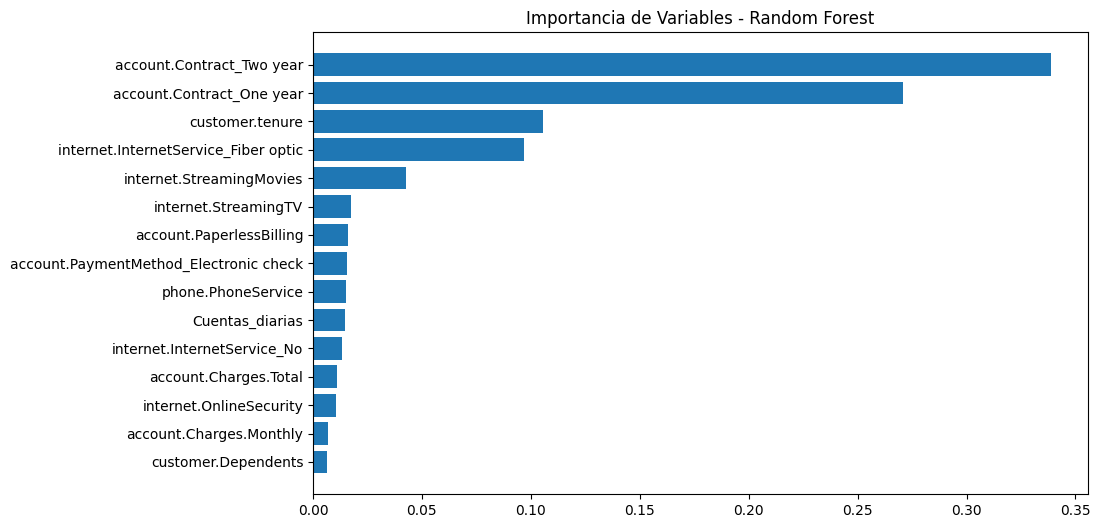

In [250]:
# Importancia de variables desde tu modelo entrenado
importancias_var_rf = random_forest_sm.feature_importances_

# Asociar con nombres de las columnas usadas en el entrenamiento balanceado
variables = X_train_bal.columns
importancias_var_rf = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar las 10 más importantes
print(f'📊  Resumen de Incidencia de Variable dentro del Modelo Random Forest\n')
print(importancias_var_rf.head(10))
print()


# 📊 Gráfico
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Variable'][:15], df_importancia['Importancia'][:15])
plt.gca().invert_yaxis()
plt.title("Importancia de Variables - Random Forest")
plt.show()


🟠  Análisis: Importancia de Variables en la Predicción de Evasión de Clientes.

El modelo de Árbol de Decisión y el de Random Forest coinciden en señalar un mismo conjunto de variables como las más influyentes para explicar la deserción de clientes (churn).

🔑 **Variables más influyentes:**
* **Tipo de Contrato.**

  Contratos de dos años (33.9%) y un año (27.1%) son los factores más determinantes.

  Esto confirma que los contratos de mayor plazo están asociados a una menor probabilidad de fuga, mientras que los contratos más cortos son un foco de mayor riesgo.

* **Antigüedad del Cliente.** (10.5%)

  A mayor tiempo de permanencia, menor tendencia a desertar.

  Los clientes más nuevos son los más vulnerables a irse.

* **Tipo de Internet:**

 Fibra Óptica (9.7%)

  Es un claro diferenciador: los clientes con fibra presentan tasas de evasión más altas que quienes usan DSL o no tienen internet.

* **Servicios de Streaming** (TV y Películas: 6.0% combinados)

  Aunque no son decisivos por sí mismos, su presencia ayuda a diferenciar planes y clientes con mayor o menor propensión a irse.

* **Facturación y Métodos de Pago**  (~3%)

 La factura electrónica y el pago por cheque electrónico aparecen como señales asociadas a mayor evasión.

 Probablemente reflejan un perfil de cliente menos fidelizado o más sensible al precio.

* **Telefonía y Cuentas Diarias** (~3%)

 Son variables con un impacto menor, pero contribuyen en la segmentación del riesgo.



🎯 **Conclusión.**

El tipo de contrato es, con diferencia, el factor más importante: contratos largos retienen, contratos cortos desertan.

La antigüedad y el tipo de internet (fibra óptica) son los siguientes factores críticos.

Los servicios adicionales y la forma de facturación/pago actúan como señales secundarias, útiles para afinar la predicción.

En resumen: la retención se gana en el momento de la contratación y en la oferta del tipo de internet. Los demás factores ayudan a explicar diferencias, pero con menor peso.

**Nota Estratégica.**

Si bien estas variables permiten identificar los principales drivers de evasión, los modelos aún requieren ajustes adicionales para mejorar la precisión y minimizar los errores de clasificación.
Además, se recomienda profundizar en la búsqueda de nuevos insights a partir de combinaciones de variables y patrones de comportamiento, con el fin de enriquecer el entendimiento de la evasión y proponer acciones más efectivas de retención.

🟠  Estrategias de Retención Preliminares (basadas en hallazgos exploratorios)

> ⚠️ Nota: Estas estrategias se plantean en base a resultados preliminares del análisis de variables influyentes en la evasión. Aún no se cuenta con un modelo terminado ni ajustado, por lo que las recomendaciones deben considerarse como hipótesis iniciales de trabajo.

1. **Contratos.**

  **Hallazgo:** Los contratos de 1 y 2 años reducen la probabilidad de cancelación en comparación con los contratos mensuales.

  **Estrategia preliminar:** Incentivar la migración de clientes con contrato mensual hacia contratos anuales o bianuales, ofreciendo beneficios como descuentos, acumulación de puntos o servicios adicionales sin costo.

2. **Antigüedad (Tenure).**

  **Hallazgo:** Los clientes con menor antigüedad presentan tasas más altas de evasión.

  **Estrategia preliminar:** Diseñar un programa de fidelización para nuevos clientes en sus primeros 6 meses, reforzando la percepción de valor con promociones, soporte preferencial y comunicación proactiva.

3. **Tipo de Internet – Fibra Óptica.***

  **Hallazgo:** Los clientes con fibra óptica presentan mayor riesgo de evasión.

  **Estrategia preliminar:**

  Revisar problemas de servicio asociados a la fibra (estabilidad, velocidad real vs. contratada, soporte técnico).

  Implementar monitoreo proactivo de calidad en clientes de fibra y ofrecer compensaciones automáticas frente a fallas detectadas.

4. **Servicios de Valor Agregado (TV y Películas Streaming).**

  **Hallazgo:** Estos servicios aparecen asociados a menor evasión en ciertos clientes.

  **Estrategia preliminar:** Promover paquetes de servicios con TV y películas para aumentar la percepción de valor y “atar” al cliente con más de un servicio.

5. **Facturación y Forma de Pago.**

  **Hallazgo:** Métodos como cheque electrónico y facturación sin papel (paperless) muestran asociación con mayor evasión.

  **Estrategia preliminar:**

  Analizar la experiencia de pago en estos clientes (fricciones, errores, comisiones).

  Incentivar métodos de pago más estables como débito automático o tarjeta de crédito, vinculando promociones exclusivas a dichos medios.